In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader
import _ressources.analysis_tools.analysis as an

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))
nu = np.pi/3. / np.sin(np.pi/3.)


In [2]:
eps = 1e-3
mu = 0.6105653703843762
tauv = 1.

In [98]:
def calc_T(ell0, chiv, A0, N0=100, tauv=1.) :
    global eps, mu
    L0 = np.sqrt(A0*mu)
    xiv = chiv*ell0
    Ltot = 2*L0+ell0
    #return (2*tauv* (Ltot/N0)**2)/(mu*eps*xiv**2) 
    print(tauv)
    return (2*tauv*ell0*L0)/(mu*eps*xiv**2)

In [103]:
d = '/Users/mathieuleverge/git/chain_lumen/_data/100lumens/'
nt1 = np.loadtxt(os.path.join(d, 'chiv500_A1_ell1', 'sim_nlum.dat'))
nt1_bis = np.loadtxt(os.path.join(d, 'chiv500_A1_ell1_bis', 'sim_nlum.dat'))

nt2 = np.loadtxt(os.path.join(d, 'chiv500_A1_ell10', 'sim_nlum.dat'))
nt2_bis = np.loadtxt(os.path.join(d, 'chiv500_A1_ell10_bis', 'sim_nlum.dat'))

nt3 = np.loadtxt(os.path.join(d, 'chiv500_A10_ell1', 'sim_nlum.dat'))
nt3_bis = np.loadtxt(os.path.join(d, 'chiv500_A10_ell1_bis', 'sim_nlum.dat'))

nt4 = np.loadtxt(os.path.join(d, 'chiv500_A1_ell100', 'sim_nlum.dat'))
#nt3_bis = np.loadtxt(os.path.join(d, 'chiv500_A10_ell1_bis', 'sim_nlum.dat'))


1.0
1.0
1.0
1.0


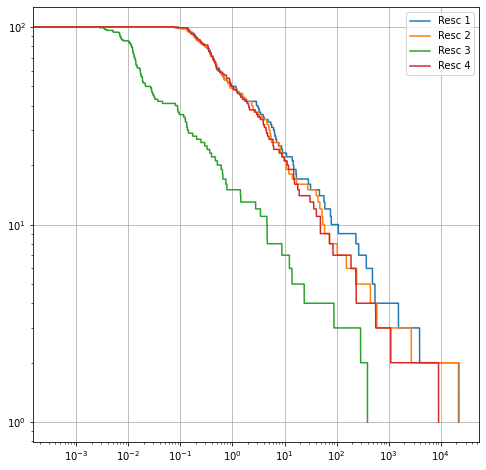

In [104]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')

ell, A0 = 1, 1
plt.plot(nt1[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt1[:, 1], label = 'Resc 1')
#plt.plot(nt1_bis[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt1_bis[:, 1], label = 'NR 1')

ell, A0 = 10, 1
plt.plot(nt2[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt2[:, 1], label = 'Resc 2')
#plt.plot(nt2_bis[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt2_bis[:, 1], label = 'NR 2')

ell, A0 = 1, 10.
plt.plot(nt3[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0, tauv=1.), nt3[:, 1], label = 'Resc 3')
#plt.plot(nt3_bis[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt3_bis[:, 1], label = 'NR 3')

ell, A0 = 100, 1
plt.plot(nt4[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt4[:, 1], label = 'Resc 4')
#plt.plot(nt2_bis[:, 0]/calc_T(ell0=ell, chiv=500, A0=A0), nt2_bis[:, 1], label = 'NR 2')

plt.grid()
plt.legend()

NameError: name 'nt4' is not defined

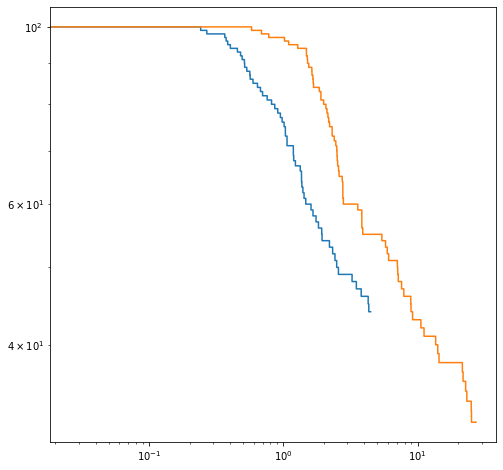

In [140]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')
#plt.plot(nt1[:, 0], nt1[:, 1], label='\chi')

ell=10
A0=1
T = calc_T(ell0=ell, chiv=500, A0=A0)
plt.plot(nt2[:, 0]/T, nt2[:, 1], label = r'$L_0$ = '+str(np.sqrt(A0*mu))+ r', $\ell_0$='+str(ell))

ell=10
A0=2
T = calc_T(ell0=10, chiv=500, A0=A0)
plt.plot(nt3[:, 0]/T, nt3[:, 1], label = r'$L_0$ = '+str(np.sqrt(A0*mu))+ r', $\ell_0$='+str(ell))

ell=10
A0=5
T = calc_T(ell0=10, chiv=500, A0=A0)
plt.plot(nt4[:, 0]/T, nt4[:, 1], label = r'$L_0$ = '+str(np.sqrt(A0*mu))+ r', $\ell_0$='+str(ell))

ell=1
A0=5
T = calc_T(ell0=1, chiv=500, A0=A0)
plt.plot(nt5[:, 0]/T, nt5[:, 1], label = r'$L_0$ = '+str(np.sqrt(A0*mu))+ r', $\ell_0$='+str(ell))

ell=2
A0=5
T = calc_T(ell0=2, chiv=500, A0=A0)
plt.plot(nt6[:, 0]/T, nt6[:, 1], label = r'$L_0$ = '+str(np.sqrt(A0*mu))+ r', $\ell_0$='+str(ell))

plt.xlabel(r'$t \times \frac{\mu \epsilon \xi_v^2}{2 \tau_v \ell_0 L_0^2}$', fontsize=25)

plt.legend(fontsize=15)
plt.show()

In [ ]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/tests_1/', 'config.conf'))

In [100]:
lt = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/chiv500_chis1/run0000/distrib_length.dat', usecols=0)
dat = np.genfromtxt('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/chiv500_chis1/run0000/distrib_length.dat', skip_footer=len(lt)-1)[1:]


(array([  2.,  10.,  38.,  82., 169., 229., 245., 153.,  63.,   9.]),
 array([0.4827522 , 0.53273106, 0.58270991, 0.63268876, 0.68266762,
        0.73264647, 0.78262533, 0.83260418, 0.88258304, 0.93256189,
        0.98254075]),
 <BarContainer object of 10 artists>)

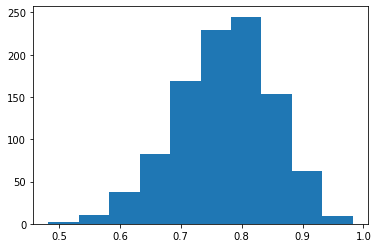

In [101]:
plt.hist(dat)

In [82]:
L = []
for i in ch.lumens_dict.keys() :
    L += [ch.lumens_dict[i].length]
    
L = np.array(L)

In [83]:
np.nanmean(L)

0.7696591749461874

(array([  8.,   3.,  12.,  22.,  35.,  41.,  78., 133., 165., 226., 257.,
        334., 345., 442., 415., 428., 396., 390., 348., 269., 208., 171.,
        105.,  79.,  36.,  20.,  17.,   7.,   5.,   6.]),
 array([0.        , 0.04078183, 0.08156365, 0.12234548, 0.1631273 ,
        0.20390913, 0.24469095, 0.28547278, 0.32625461, 0.36703643,
        0.40781826, 0.44860008, 0.48938191, 0.53016373, 0.57094556,
        0.61172738, 0.65250921, 0.69329104, 0.73407286, 0.77485469,
        0.81563651, 0.85641834, 0.89720016, 0.93798199, 0.97876382,
        1.01954564, 1.06032747, 1.10110929, 1.14189112, 1.18267294,
        1.22345477]),
 <BarContainer object of 30 artists>)

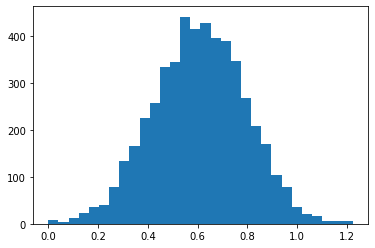

In [84]:
plt.hist(L**2, bins=30)

In [90]:
(2*np.sqrt(mu)+10.)*1000

11562.773650128996

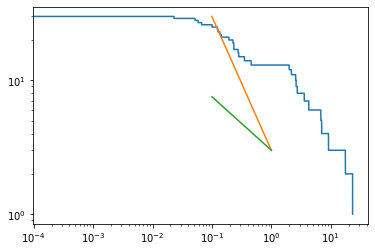

In [143]:
Nt = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/videos/30lumens_pumping/sim_nlum.dat')

plt.xscale('log')
plt.yscale('log')
plt.plot(Nt[:, 0], Nt[:, 1])

k, a = 3, -1.
t = np.logspace(-1, 0, 101)
plt.plot(t, k*t**a)

k, a = 3, -2/5.
t = np.logspace(-1, 0, 101)
plt.plot(t, k*t**a)

In [141]:
1./(nu*mu*2.), 2/(mu*eps*94.26005895266742**2)


(0.6772357091035655, 0.36867391680169237)

In [147]:
mu

0.6105653703843762